# References and resources 

* https://www.int-arch-photogramm-remote-sens-spatial-inf-sci.net/XLIII-B2-2020/1343/2020/isprs-archives-XLIII-B2-2020-1343-2020.pdf
* Dataset : https://mlhub.earth/data/sen12floods

# Imports 

In [1]:
!pip install radiant_mlhub -q

In [39]:
import os 
from radiant_mlhub import get_session
from radiant_mlhub import Dataset,Collection
import shutil
import geopandas as gpd 

#get key
from kaggle_secrets import UserSecretsClient
user_secrets = UserSecretsClient()
secret_value_0 = user_secrets.get_secret("RadiantEarth_MLHub")


#authenticate
os.environ['MLHUB_API_KEY'] = secret_value_0
session = get_session()

In [31]:

ds = Dataset.fetch('sen12floods')


print('total size of the dataset %1.2f' % (ds.total_archive_size/ 1024**3))

for file in ds.collections:
    print(f'{file.id}: {file.title}....Size in MB is {round(file.archive_size/(1024**2),4)}')

total size of the dataset 9.81
sen12floods_s1_labels: None....Size in MB is 0.977
sen12floods_s1_source: None....Size in MB is 6065.5109
sen12floods_s2_labels: None....Size in MB is 0.7927
sen12floods_s2_source: None....Size in MB is 3978.0655


In [32]:
#make directory 
!mkdir sen12flood && ls

mkdir: cannot create directory ‘sen12flood’: File exists


In [33]:
#download dataset
ds.download(output_dir='sen12flood')

  0%|          | 0/1.0 [00:00<?, ?M/s]

  0%|          | 0/6360.1 [00:00<?, ?M/s]

  0%|          | 0/0.8 [00:00<?, ?M/s]

  0%|          | 0/4171.3 [00:00<?, ?M/s]

[PosixPath('/kaggle/working/sen12flood/sen12floods_s1_labels.tar.gz'),
 PosixPath('/kaggle/working/sen12flood/sen12floods_s1_source.tar.gz'),
 PosixPath('/kaggle/working/sen12flood/sen12floods_s2_labels.tar.gz'),
 PosixPath('/kaggle/working/sen12flood/sen12floods_s2_source.tar.gz')]

In [59]:
!tar  -xzf /kaggle/working/sen12flood/sen12floods_s1_labels.tar.gz 

In [60]:
#check total num of files 
!ls sen12floods_s1_labels | wc -l

3333


In [61]:
chk = gpd.read_file('sen12floods_s1_labels/sen12floods_s1_labels_0214_2019_03_18/labels.geojson')

chk.total_bounds

array([ 32.797555, -19.826235,  32.846492, -19.779918])

<AxesSubplot:>

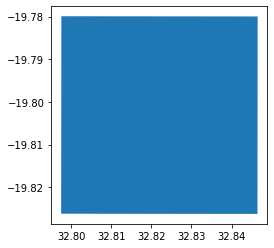

In [62]:
chk.plot()

In [63]:
!rm -r sen12floods_s1_labels